## Detecting Twitter Bots

### Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file= 'BotsData.csv'
TrainingData = pd.read_csv('drive/My Drive/Colab Notebooks/BotsData.csv')
bot = TrainingData[TrainingData.bot==1]
nonbot = TrainingData[TrainingData.bot==0]

### Data Preprocessing

In [ ]:
bot['friendsfollowersRatio'] = bot.friends_count/bot.followers_count
bot[bot.friendsfollowersRatio<1].shape

nonbot['friendsfollowersRatio'] = nonbot.friends_count/nonbot.followers_count
nonbot[nonbot.friendsfollowersRatio<1].shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


(952, 21)

In [ ]:
###PUBLIC LISTS MEMBER BOT VS NONBOT

(504, 21)


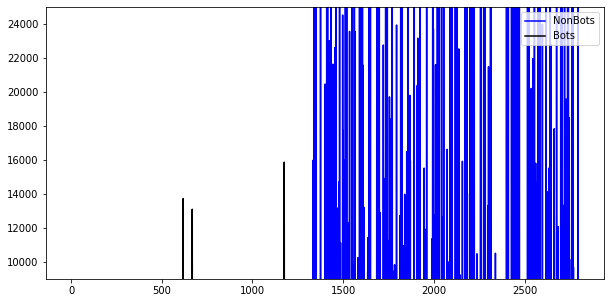

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(nonbot.listed_count, color='blue', label='NonBots')
plt.plot(bot.listed_count, color='black', label='Bots')
plt.legend(loc='upper right')
plt.ylim(9000,25000)
print(bot[(bot.listed_count<5)].shape)

In [ ]:
botslistedcountdf = bot[bot.listed_count<16000]
nonbotslistedcountdf = nonbot[nonbot.listed_count<16000]

botsverifieddf = botslistedcountdf[botslistedcountdf.verified==False]
botsscreennamehasbotdf = botsverifieddf[(botsverifieddf.screen_name.str.contains("bot", case=False)==True)].shape

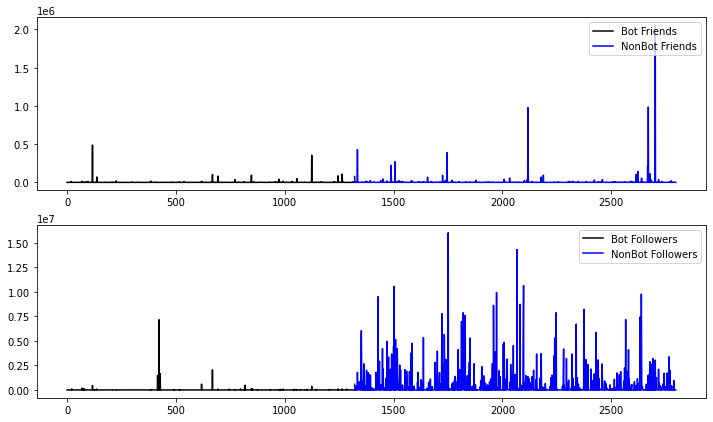

In [ ]:
plt.figure(figsize=(12,7))

plt.subplot(2,1,1)
plt.plot(botslistedcountdf.friends_count, color='black', label='Bot Friends')
plt.plot(nonbotslistedcountdf.friends_count, color='blue', label='NonBot Friends')
plt.legend(loc='upper right')

plt.subplot(2,1,2)
plt.plot(botslistedcountdf.followers_count, color='black', label='Bot Followers')
plt.plot(nonbotslistedcountdf.followers_count, color='blue', label='NonBot Followers')
plt.legend(loc='upper right')

#### Bot detection metric (Account Activity)

In [ ]:
condition = (bot.screen_name.str.contains("bot", case=False)==True)|(bot.description.str.contains("bot", case=False)==True)|(bot.location.isnull())|(bot.verified==False)

bot['screennamebinary'] = (bot.screen_name.str.contains("bot", case=False)==True)
bot['locationbinary'] = (bot.location.isnull())
bot['verifiedbinary'] = (bot.verified==False)
bot.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

(1321, 24)

In [ ]:
condition = (nonbot.screen_name.str.contains("bot", case=False)==False)| (nonbot.description.str.contains("bot", case=False)==False) |(nonbot.location.isnull()==False)|(nonbot.verified==True)

nonbot['screennamebinary'] = (nonbot.screen_name.str.contains("bot", case=False)==False)
nonbot['locationbinary'] = (nonbot.location.isnull()==False)
nonbot['verifiedbinary'] = (nonbot.verified==True)

nonbot.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

(1476, 24)

In [ ]:
df = pd.concat([bot, nonbot])
df.shape

(2797, 24)

In [ ]:
file= open('drive/My Drive/Colab Notebooks/BotsData.csv', mode='r', encoding='utf-8', errors='ignore')

TrainingData = pd.read_csv(file)

StopWords = r'bot|b0t|cannabis|tweet me|mishear|follow me|updates every|gorilla|yes_ofc|forget' \
                    r'expos|kill|bbb|truthe|fake|anony|free|virus|funky|RNA|kuck|jargon' \
                    r'nerd|swag|jack|bang|bonsai|chick|prison|paper|pokem|freak|ffd|dunia|clone|genie|bbb' \
                    r'ffd|onlyman|emoji|joke|troll|droop|free|every|wow|cheese|yeah|bio|magic|wizard|face'

###STOP WORDS TAKEN FROM https://github.com/martha92/MeTooAnalysis/blob/e2dd051866a79ccb065507d304dfd98168e6b0c2/bot_human/bot_human_custom.py
            
TrainingData['screennamebinary'] = TrainingData.screen_name.str.contains(StopWords, case=False, na=False)
TrainingData['namebinary'] = TrainingData.name.str.contains(StopWords, case=False, na=False)
TrainingData['descriptionbinary'] = TrainingData.description.str.contains(StopWords, case=False, na=False)
TrainingData['statusbinary'] = TrainingData.status.str.contains(StopWords, case=False, na=False)

In [ ]:
TrainingData['listedcountbinary'] = (TrainingData.listed_count>20000)==False
feature = ['screennamebinary', 'namebinary', 'descriptionbinary', 'statusbinary', 'verified', 'followers_count', 'friends_count', 'statuses_count', 'listedcountbinary', 'bot']

#### Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.model_selection import train_test_split

X = TrainingData[feature].iloc[:,:-1]
y = TrainingData[feature].iloc[:,-1]

dt = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=50, min_samples_split=10)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

dt = dt.fit(X_train, y_train)
y_pred_train = dt.predict(X_train)
y_pred_test = dt.predict(X_test)


print("Trainig Accuracy: %.5f" %accuracy_score(y_train, y_pred_train))
print("Test Accuracy: %.5f" %accuracy_score(y_test, y_pred_test))


Trainig Accuracy: 0.88412
Test Accuracy: 0.87429


In [ ]:
print(X_test)

      screennamebinary  namebinary  descriptionbinary  statusbinary  verified  \
2409             False       False              False         False     False   
416              False       False               True         False     False   
1193             False       False              False         False     False   
1970             False       False               True         False     False   
1854             False       False              False          True      True   
...                ...         ...                ...           ...       ...   
931               True       False               True          True     False   
1626             False       False              False         False      True   
925              False       False               True          True     False   
2440             False       False              False         False      True   
1394             False       False              False          True      True   

      followers_count  frie

In [ ]:
import pandas as pd
import tweepy
from tweepy import OAuthHandler
import re
import io
import csv

consumer_key="VAK69Ll6UrcDYWMs3neOQDkiA"
consumer_key_secret="ijMr1mzoIHUzXBs20UsEXaK90IL6fn1n9w47ocvhTRq2JF5jFn"
access_token="3075384460-34k2qIZVBjT6Xj3917Zfuc5SCrwysM1gV4k7pFM"
access_token_secret="aRLO6DUfT1MpSUGXGYJYfMKkxuYxfrbwlj7kzueGLDtQM"

auth=OAuthHandler(consumer_key,consumer_key_secret)
auth.set_access_token(access_token,access_token_secret)
api=tweepy.API(auth)



#ob="everycolorbot" #bot example
ob="hassanabid085" #not bot example
user=api.get_user(ob)

population_dict = {'screennamebinary': [user.screen_name],
                   'namebinary': [user.name],
                   'descriptionbinary': [user.description],
                   'statusbinary': [user.status],
                   'verified': [user.verified],
                   'followers_count': [user.followers_count],
                   'friends_count': [user.friends_count],
                   'statuses_count': [user.statuses_count],
                   'listedcountbinary': [user.listed_count]}
                
population = pd.DataFrame(population_dict)

population['screennamebinary'] = population.screennamebinary.str.contains(StopWords, case=False, na=False)|(population.screennamebinary.str.contains("bot", case=False)==True)
population['namebinary'] = population.namebinary.str.contains(StopWords, case=False, na=False)
population['descriptionbinary'] = population.descriptionbinary.str.contains(StopWords, case=False, na=False)|(population.descriptionbinary.str.contains("bot", case=False)==True)
population['statusbinary'] = population.statusbinary.str.contains(StopWords, case=False, na=False)
population['listedcountbinary'] = (population.listedcountbinary>20000)==False

if(dt.predict(population)==0):
  print("Non Bot")
else:
  print ("Bot")

Non Bot
